In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
df = pd.read_csv('../../capstone_data/Azimuth/clean/project_1074_featurized.csv')
df.dropna(inplace=True)
df.info()
df['t'] = pd.to_datetime(df['t'], format='%Y-%m-%d %H:%M:%S')
df.sort_values('t',inplace=True)
df = df.set_index('t')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Columns: 120 entries, t to v3_D_mean
dtypes: float64(77), int64(40), object(3)
memory usage: 15.3+ MB


In [3]:
for c in df.columns:
    print c

project_id
relay
load_v1rms
load_v2rms
load_v3rms
load_i1rms
load_i2rms
laod_i3rms
year
day
relay_est
t_diff
data_issue
begin_gen
load_v1rms-1
load_v2rms-1
load_v3rms-1
load_i1rms-1
load_i2rms-1
laod_i3rms-1
relay_est-1
t_diff-1
load_v1rms-2
load_v2rms-2
load_v3rms-2
load_i1rms-2
load_i2rms-2
laod_i3rms-2
relay_est-2
t_diff-2
load_v1rms-3
load_v2rms-3
load_v3rms-3
load_i1rms-3
load_i2rms-3
laod_i3rms-3
relay_est-3
t_diff-3
load_v1rms-4
load_v2rms-4
load_v3rms-4
load_i1rms-4
load_i2rms-4
laod_i3rms-4
relay_est-4
t_diff-4
load_v1rms_H_std
load_v2rms_H_std
load_v3rms_H_std
load_i1rms_H_std
load_i2rms_H_std
laod_i3rms_H_std
relay_est_7D_sum
begin_gen_7D_sum
month_5
month_6
month_7
month_8
dayofweek_0
dayofweek_1
dayofweek_2
dayofweek_3
dayofweek_4
dayofweek_5
dayofweek_6
hour_0
hour_1
hour_2
hour_3
hour_4
hour_5
hour_6
hour_7
hour_8
hour_9
hour_10
hour_11
hour_12
hour_13
hour_14
hour_15
hour_16
hour_17
hour_18
hour_19
hour_20
hour_21
hour_22
hour_23
datetime_hr
lat
lon
cumulated hours
v1
v

In [4]:
df['power_1'] = df['load_v1rms'] * df['load_i1rms']
df['power_2'] = df['load_v2rms'] * df['load_i2rms']
df['power_3'] = df['load_v3rms'] * df['laod_i3rms']
df['power_all'] = df['power_1'] +df['power_2']+df['power_3'] * 5./12

In [5]:
y = df['power_all']
y = y.fillna(y.bfill())
y = pd.DataFrame(y.resample('H').sum())

In [6]:
exog = df['T']
exog = exog.fillna(exog.bfill())
exog = pd.DataFrame(exog.resample('H').mean())

In [7]:
y['T-1'] = exog['T'].shift(1)
y = y.fillna(y.bfill())

In [67]:
exog = df['vap_precip']
exog = exog.fillna(exog.bfill())
exog = pd.DataFrame(exog.resample('H').mean())

In [68]:
y['V_precip-1'] = exog['vap_precip'].shift(1)
y = y.fillna(y.bfill())

In [69]:
exog = df['p']
exog = exog.fillna(exog.bfill())
exog = pd.DataFrame(exog.resample('H').mean())

In [70]:
y['p-1'] = exog['p'].shift(1)
y = y.fillna(y.bfill())

In [71]:
feature = 'cloud-2'
exog = df[feature]
exog = exog.fillna(exog.bfill())
exog = pd.DataFrame(exog.resample('H').mean())

In [72]:
y['cloud-1'] = exog[feature].shift(1)
y = y.fillna(y.bfill())

In [73]:
feature = 'v3'
exog = df[feature]
exog = exog.fillna(exog.bfill())
exog = pd.DataFrame(exog.resample('H').mean())

In [74]:
y['v3-1'] = exog[feature].shift(1)
y = y.fillna(y.bfill())

In [75]:
feature = 'rho'
exog = df[feature]
exog = exog.fillna(exog.bfill())
exog = pd.DataFrame(exog.resample('H').mean())

In [76]:
y['rho-1'] = exog[feature].shift(1)
y = y.fillna(y.bfill())

In [85]:
feature = 'relay_est_7D_sum'
exog = df[feature]
exog = exog.fillna(exog.bfill())
exog = pd.DataFrame(exog.resample('H').mean())

In [86]:
y['relay_est_7D_sum-1'] = exog[feature].shift(1)
y = y.fillna(y.bfill())

In [87]:
y.head()

,power_all,T-1,V_precip-1,cloud-1,v3-1,rho-1,p-1,relay_est_7D_sum-1
t,,,,,,,,
2017-05-27 00:00:00,285996.171862,297.161987,50.992336,40.417969,3.0725,1.161250,100238.851562,0.0
2017-05-27 01:00:00,625266.069709,297.161987,50.992336,40.417969,3.0725,1.161250,100238.851562,0.0
2017-05-27 02:00:00,537174.040827,297.078735,49.625359,35.517578,2.7775,1.160896,100174.781250,0.0
2017-05-27 03:00:00,635851.446381,296.910400,48.661022,30.673828,2.9175,1.160928,100133.546875,0.0
2017-05-27 04:00:00,643099.330750,296.664276,48.178101,26.767578,3.2800,1.161475,100121.062500,0.0


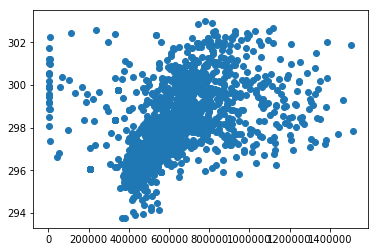

In [78]:
plt.scatter(y['power_all'].values, y['T-1'].values)

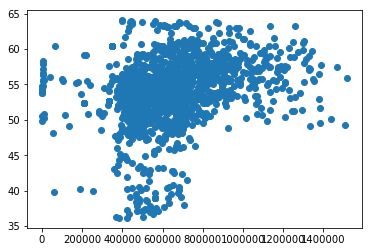

In [79]:
plt.scatter(y['power_all'].values, y['V_precip-1'].values)

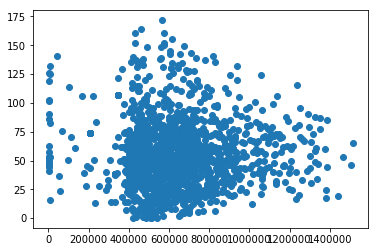

In [80]:
plt.scatter(y['power_all'].values, y['cloud-1'].values)

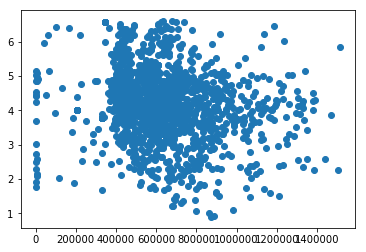

In [81]:
plt.scatter(y['power_all'].values, y['v3-1'].values)

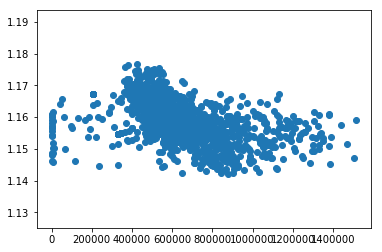

In [82]:
plt.scatter(y['power_all'].values, y['rho-1'].values)

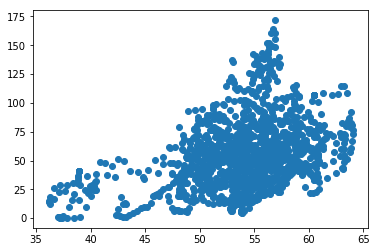

In [83]:
plt.scatter(y['V_precip-1'].values, y['cloud-1'].values)

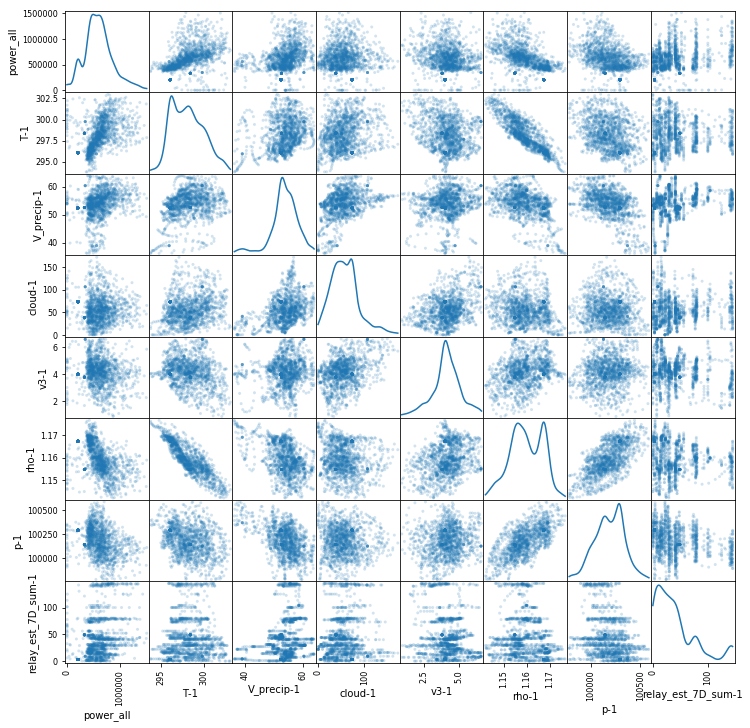

In [88]:
scatter_matrix(y, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

In [ ]:
Y = y['power_all']

In [48]:
X = sm.add_constant(y[['cloud-1']])

In [49]:
model = sm.OLS(Y, X)
result = model.fit()

In [50]:
print result.summary()

                            OLS Regression Results                            
Dep. Variable:              power_all   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     7.211
Date:                Tue, 29 Aug 2017   Prob (F-statistic):            0.00732
Time:                        14:54:52   Log-Likelihood:                -21976.
No. Observations:                1584   AIC:                         4.396e+04
Df Residuals:                    1582   BIC:                         4.397e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.325e+05   1.43e+04     44.307      0.0